# Neural Ordinary Differential Equations

## Summary

NeurIPS is the largest AI conference in the world. 4,854 papers were submitted. 4 received "Best paper" award. This is one of them. The basic idea is that neural networks are made up of stacked layers of simple computation nodes that work together to approximate a function. If we re-frame a neural network as an "Ordinary Differential Equation", we can use existing ODE solvers (like Euler's method) to approximate a function. This means no discrete layers, instead the network is a continous function. No more specifying the # of layers beforehand, instead specify the desired accuracy, it will learn how to train itself within that margin of error. It's still early stages, but this could be as big a breakthrough as GANs! 

![alt text](https://betterexplained.com/wp-content/uploads/2017/03/discrete-vs-continuous-growth.png)

## Demo 
An ODENet approximated this spiral function better than a Recurrent Network. 

![alt text](https://cdn-images-1.medium.com/max/1600/1*y4YDA2Q25omrfuMuv3YnXA.png)


## Why Does this matter? 

1. Faster testing time than recurrent networks, but slower training time. Perfect for low power edge computing! (precision vs speed)
2. More accurate results for time series predictions (!!) i.e continous-time models
3. Opens up a whole new realm of mathematics for optimizing neural networks (Diff Equation Solvers, 100+ years of theory)
4, Compute gradients with constant memory cost


## Concepts we'll learn about in this video
1. Basic neural network theory
2. "Residual" neural network theory
3. Ordinary Differential Equations (ODEs)
4. ODE Networks
5. Euler's Method to Optimize an ODENet
6. Adjoint Method for ODENet Optimization
7. ODENet's Applied to time series data
8. Future Applications of ODENets


## 1 Basic Neural Network Theory

-  Neural Networks are a popular type of ML model
- Neural Networks are built with linear algebra (matrices & matrix operations) & optimized using Calculus (gradient descent & other algorithms)
- Neural networks consist of a series of "layers", which are just matrix operations
- Each layer introduces a little bit of error that compounds through the network

#### Basic Neural Network Diagram 
![alt text](https://www.researchgate.net/publication/299474560/figure/fig6/AS:349583008911366@1460358492284/An-example-of-a-deep-neural-network-with-two-hidden-layers-The-first-layer-is-the-input.png)

#### More Detailed Neural Network Diagram
![alt text](https://www.intechopen.com/media/chapter/759/media/image11.jpeg)

## Basic Neural Network Example

In [1]:
import numpy as np

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
# input dataset
X = np.array([  [0,1],
                [0,1],
                [1,0],
                [1,0] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
synapse_0 = 2*np.random.random((2,1)) - 1

for iter in range(10000):

    # forward propagation
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))

    # how much did we miss?
    layer_1_error = layer_1 - y

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
    synapse_0_derivative = np.dot(layer_0.T,layer_1_delta)

    # update weights
    synapse_0 -= synapse_0_derivative

print("Output After Training:")
print(layer_1)


Output After Training:
[[0.00505119]
 [0.00505119]
 [0.99494905]
 [0.99494905]]


## Stack More Layers?

- To reduce compounded error, add more layers! 

![alt text](http://www.ccri.com/wp-content/uploads/2017/05/stackMoreLayers.png)

![alt text](https://cdn-images-1.medium.com/max/1600/1*EVy3hNSF4Nq7v7bNYOyNcQ.png)

- The # of layers & # of neurons deeply affec the output of the network
- Too few layers could cause underfitting
- Too many layers coudl cause overfitting + long training time
 
 ![alt text](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

#### There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer

## Example: Long-Short Term Memory Neural Network with many layers

In [2]:

from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32



model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 4s 4ms/step - loss: 11.5911 - acc: 0.0770 - val_loss: 11.3207 - val_acc: 0.0800
Epoch 2/5
1000/1000 [==============================] - 0s 153us/step - loss: 11.5892 - acc: 0.0990 - val_loss: 11.3187 - val_acc: 0.1500
Epoch 3/5
1000/1000 [==============================] - 0s 150us/step - loss: 11.5882 - acc: 0.1140 - val_loss: 11.3221 - val_acc: 0.1200
Epoch 4/5
1000/1000 [==============================] - 0s 153us/step - loss: 11.5886 - acc: 0.0960 - val_loss: 11.3205 - val_acc: 0.1100
Epoch 5/5
1000/1000 [==============================] - 0s 152us/step - loss: 11.5879 - acc: 0.0970 - val_loss: 11.3195 - val_acc: 0.1500


## 2 Residual Neural Network Theory

A solution to this was proposed by Microsoft for the 2015 ImageNet competiton (residual networks)
- In December of  2015, Microsoft proposed "Residual networks" as a solution to the ImageNet Classification Competition
- ResNets had the best accuracy in the competition
- ResNets utilize "skip-connections" between layers, which increases accuracy.
- They were able to train networks of up to 1000 layers deep while avoiding vanishing gradients (lower accuracy)
- 6 months later, their publicatio already had more than 200 references.


![alt text](https://cdn-images-1.medium.com/max/800/1*Io-I-fOM0jGftDb_nne4KQ.png)

![alt text](https://image.slidesharecdn.com/deepresiduallearningforimagerecognition-160427174252/95/paper-overview-deep-residual-learning-for-image-recognition-26-638.jpg?cb=1461779162)

![alt text](https://image.slidesharecdn.com/deepresiduallearningforimagerecognition-160427174252/95/paper-overview-deep-residual-learning-for-image-recognition-29-638.jpg?cb=1461779162)

### How do ResNets work?

- Instead of hoping each stack of layers directly fits a desired underlying mapping, we explicitly let these layers fit a residual mapping. 
- The original mapping is recast into F(x)+x. 
- Residual neural networks do this by utilizing skip connections or short-cuts to jump over some layers. 
- The residual layer adds the output of the activation function to the input of the layer.
- This seemingly minor change has led to a rethinking of how neural network layers are designed.
- In its limit as ResNets it will only skip over a single layer
- With an additional weight matrix to learn the skip weights it is referred to as HighwayNets
- With several parallel skips it is referred to as DenseNets


The residual layer is actually quite simple: add the output of the activation function to the original input to the layer. As a formula, the k+1th layer has the formula:

\begin{equation} x_{k+1} = x_{k} + F(x_{k})\end{equation}

where F is the function of the kth layer and its activation. For example, F might represent a convolutional layer with a relu activation. This simple formula is a special case of the formula:

\begin{equation} x_{k+1} = x_{k} + h F(x_k),\end{equation}

which is the formula for the Euler method for solving ordinary differential equations (ODEs) when h=1

### Wait, WTF is Euler's method? What does differential equations have to do with anything? Hold that thought, look at this code first.



In [8]:
#normal convolutional layer 

def Unit(x,filters):

    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    return out

In [9]:
#residual convolutional layer

def Unit(x,filters):
    res = x
    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = keras.layers.add([res,out]) 

    return out


### Awesome, ok back to the question. What is the significance between residual networks and Ordinary Differential Equations? 

## 3 Ordinary Differential Equations

- A "differential equation" is an equation that just tells us the slope without specifying the original function whose derivative we are taking

![alt text](http://hyperphysics.phy-astr.gsu.edu/hbase/Math/immath/derint.gif)

![alt text](http://adit.io/imgs/derivatives/power_rule_examples.png)

![alt text](https://images.slideplayer.com/37/10734112/slides/slide_6.jpg)

![alt text](https://revisionworld.com/sites/revisionworld.com/files/imce/differential.gif)

![alt text](https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/images/Calculus.png)

![alt text](https://www.mathsisfun.com/calculus/images/integrals-vs-derivative.svg )


### Example Differential Equation 

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function dy/dx = x + y/5.
func = lambda y,x : x + y/5.

In [36]:
# Initial condition
y0 = -3  # at x=0
# values at which to compute the solution (needs to start at x=0)
x = np.linspace(0, 4, 101)

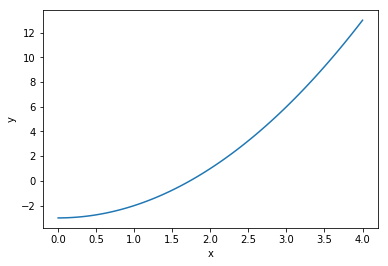

In [38]:
# solution
y = odeint(func, y0, x)
# plot the solution, note that y is a column vector
plt.plot(x, y[:,0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4 ODE (Ordinary Differential Equation) Networks


Consider a simplified ODE from physics: we want to model the position x of a marble. Assume we can calculate its velocity x′ (the derivative of position) at any position x. We know that the marble starts at rest x(0)=0 and that its velocity at time t depends on its position through the formula:

\begin{equation} x^\prime(t) = f(x) \end{equation}

The Euler method solves this problem by following the physical intuition: my position at a time very close to the present depends on my current velocity and position. For example, if you are travelling at a velocity of 5 meters per second, and you travel 1 second, your position changes by 5 meters. If we travel h seconds, we will have travelled 5h meters. As a formula, we said:

\begin{equation}x(t+h) = x(t) + h x^\prime(t),\end{equation}

but since we know

\begin{equation} x^\prime(t) = f(x) \end{equation}

we can rewrite this as

\begin{equation} x(t+h) = x(t) + h f(x).\end{equation}

If you squint at this formula for the Euler method, you can see it looks just like the formula for residual layers!

This observation has meant three things for designing neural networks:

- New neural network layers can be created through different numerical approaches to solving ODEs
- The possibility of arbitrarily deep neural networks
- Training of a deep network can be improved by considering the so-called stability of the underlying ODE and its numerical discretization

### 2 more points

- To create arbitrarily deep networks with a finite memory footprint, design neural networks based on stable ODEs and numerical discretizations.
- Gradient descent can be viewed as applying Euler's method for solving ordinary differential equation to gradient flow.  

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/f7efd24e9cf34508df8d402a5b9801290acb2afc)




## What Does an ODENet Look like? 

*An ODE is a function that usually describes the change of some system through time. In this setting, time is a continuous variable. Now imagine a neural network is that system, and time is really something more like the depth of the network. Note that there are usually a discrete number of layers in an ANN. This is a notion of continuous number of layers.*

- The team didn't use Euler's method, they computed the exact ODE solution (within a small error tolerance) using adaptive solvers (faster)
- The dynamics change smoothly with depth. You can think of this either as having weights that are a function of depth, or as having shared weights across layers but adding the depth as an extra input to f.
- Anywhere you can put a resnet you can put an ODEnet.
- Each ODEBlock can be used to replace a whole stack of ResBlocks.
- In their MNIST example, each ODEBlock replaces 6 ResBlocks.

### Traditional Deep Nets


```
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h2)
h4 = f3(h3)
y  = f5(h4)
```

### ResNets

```
h1 = f1(x)  + x
h2 = f2(h1) + h1
h3 = f3(h2) + h2
h4 = f4(h3) + h3
y  = f5(h4) + h4
```


- Where f1, f2, etc are neural net layers.
- The idea is that it's easier to model a small change to an almost-correct answer than to output the whole improved answer at once.
-This looks like a primitive ODE solver (Euler's method) that solves the trajectory of a system by just taking small steps in the direction of the system dynamics and adding them up.
-They connection allows for better training methods.
- What if we define a deep net as a continuously evolving system? 
- Instead of updating the hidden units layer by layer, we define their derivative with respect to depth instead
- We can use off-the-shelf adaptive ODE solvers to compute the final state of these dynamics, and call that the output of the neural network. 

## 5 Euler's Method 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/412px-Euler_method.svg.png)


- We want to recover the blue curve, but all we have is an initial point A_0 (think inputs to the network) and a differential equation.
- From the differential equation, we can calculate the tangent line. If we take a small step along the tangent line, we arrive at A_1, which will be close to the desired blue line if the step is small enough. 
- Repeat this process to uncover a polygonal curve A_{0}A_{1}A_{2}...A_{n}.

Many neural networks have a composition that looks exactly like the steps of Euler’s method. We start with an initial state \mathbf{z}_0, and apply successive transformations over time (layers):

![alt text](https://s0.wp.com/latex.php?latex=%5Cmathbf%7Bz%7D_1+%3D+%5Cmathbf%7Bz%7D_0+%2B+f%28%5Cmathbf%7Bz%7D_0%2C+%5Ctheta_%7B0%7D%29&bg=ffffff&fg=333333&s=0)

![alt text](https://s0.wp.com/latex.php?latex=%5Cmathbf%7Bz%7D_2+%3D+%5Cmathbf%7Bz%7D_1+%2B+f%28%5Cmathbf%7Bz%7D_1%2C+%5Ctheta_%7B1%7D%29&bg=ffffff&fg=333333&s=0)

![alt text](https://s0.wp.com/latex.php?latex=%5Cmathbf%7Bz%7D_3+%3D+%5Cmathbf%7Bz%7D_2+%2B+f%28%5Cmathbf%7Bz%7D_2%2C+%5Ctheta_%7B2%7D%29&bg=ffffff&fg=333333&s=0)

…

![alt text](https://s0.wp.com/latex.php?latex=%5Cmathbf%7Bz%7D_%7Bt%2B1%7D+%3D+%5Cmathbf%7Bz%7D_t+%2B+f%28%5Cmathbf%7Bz%7D_t%2C+%5Ctheta_%7Bt%7D%29&bg=ffffff&fg=333333&s=0)


### In the limit, we parameterize the continuous dynamics of hidden units using an ordinary differential equation (ODE) specified by a neural network:

![alt text](https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+%5Cfrac%7Bd%5Cmathbf%7Bz%7D%28t%29%7D%7Bdt%7D+%3D+f%28%5Cmathbf%7Bz%7D%28t%29%2C+t%2C+%5Ctheta%29&bg=ffffff&fg=333333&s=0
)

### The equivalent of having T layers in the network, is finding the solution to this ODE at time T.

![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Fig-1.jpeg?w=480)

- Euler’s method is perhaps the simplest method for solving ODEs. 
- There since been more than 120 years of development of efficient and accurate ODE solvers. 
- Modern ODE solvers provide guarantees about the growth of approximation error, monitor the level of error, and adapt their evaluation strategy on the fly to achieve the requested level of accuracy. 
- This allows the cost of evaluating a model to scale with problem complexity.


### We’ve seen how to feed-forward, but how do you efficiently train a network defined as a differential equation? The answer lies in the adjoint method (which dates back to 1962). Think of the adjoint as the instantaneous analog of the chain rule.

## 6 The Adjoint Method

- This approach computes gradients by solving a second, augmented ODE backwards in time, and is applicable to all ODE solvers. 
- This approach scales linearly with problem size, has low memory cost, and explicitly controls numerical error.
- The adjoint captures how the loss function L changes with respect to the hidden state.
- Starting from the output of the network, we can recompute the hidden state backwards in time together with the adjoint.


![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Fig-2.jpeg?w=480)

- A third integral then tells us how the loss changes with the parameters \theta ( dL/d\theta).
- All three of these integrals can be computed in a single call to an ODE solver, which concatenates the original state, the adjoint, and the other partial derivatives into a single vector. 
- Algorithm 1 shows how to construct the necessary dynamics, and call an ODE solver to compute all gradients at once.

![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Alg-1.jpeg?w=640)




## ODE Net Example

In [1]:
import os
import argparse
import logging
import time
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
## Import the Adjoint Method (ODE Solver)
from torchdiffeq import odeint_adjoint as odeint
import torch
import torch.nn as nn
## Normal Residual Block Example
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

def norm(dim):
    return nn.GroupNorm(min(32, dim), dim)


class Flatten(nn.Module):

    def __init__(self):
        super(Flatten, self).__init__()

    def forward(self, x):
        shape = torch.prod(torch.tensor(x.shape[1:])).item()
        return x.view(-1, shape)
class ResBlock(nn.Module):

    #init a block - Convolve, pool, activate, repeat
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(ResBlock, self).__init__()
        self.norm1 = norm(inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.norm2 = norm(planes)
        self.conv2 = conv3x3(planes, planes)

    #Forward pass - pass output of one layer to the input of the next 
    def forward(self, x):
        shortcut = x
        out = self.relu(self.norm1(x))
        out = self.conv1(out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(out)

        return out + shortcut

## Ordinary Differential Equation Definition     

class ODEfunc(nn.Module):

    # init ODE variables
    def __init__(self, dim):
        super(ODEfunc, self).__init__()
        self.norm1 = norm(dim)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = conv3x3(dim, dim)
        self.norm2 = norm(dim)
        self.conv2 = conv3x3(dim, dim)
        self.norm3 = norm(dim)
        self.nfe = 0

    # init ODE operations 
    def forward(self, t, x):
      #nfe = number of function evaluations per timestep
        self.nfe += 1
        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.norm3(out)
        return out


 ## ODE block
class ODEBlock(nn.Module):

    #initialized as an ODE Function
    #count the time
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc
        self.integration_time = torch.tensor([0, 1]).float()

    #foorward pass 
    #input the ODE function and input data into the ODE Solver (adjoint method)
    # to compute a forward pass
    def forward(self, x):
        self.integration_time = self.integration_time.type_as(x)
        out = odeint(self.odefunc, x, self.integration_time, rtol=args.tol, atol=args.tol)
        return out[1]

    @property
    def nfe(self):
        return self.odefunc.nfe

    @nfe.setter
    def nfe(self, value):
        self.odefunc.nfe = value

## Main Method

if __name__ == '__main__':


    device = torch.device('cpu')
    #Add Pooling
    downsampling_layers = [
         nn.Conv2d(1, 64, 3, 1),
         ResBlock(64, 64, stride=2, downsample=conv1x1(64, 64, 2)),
         ResBlock(64, 64, stride=2, downsample=conv1x1(64, 64, 2)),
     ]
    
    # Initialize the network as 1 ODE Block
    feature_layers = [ODEBlock(ODEfunc(64))] 
    # Fully connected Layer at the end
    fc_layers = [norm(64), nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d((1, 1)), Flatten(), nn.Linear(64, 10)]
  
    #The Model consists of an ODE Block, pooling, and a fully connected block at the end
    model = nn.Sequential(*downsampling_layers, *feature_layers, *fc_layers).to(device)

    #Declare Gradient Descent Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

    batches_per_epoch = len(x)
    #Training Loop
    for itr in range(160 * batches_per_epoch):

        
        #init the optimizer
        optimizer.zero_grad()
        
        #Generate training data
        x, y = data_gen()
        #Input Training data to model, get Prediction
        logits = model(x)
        #Compute Error using Prediction vs Actual Label
        loss = CrossEntropyLoss(logits, y)
        
        #Backpropagate
        loss.backward()
        optimizer.step()

NameError: name 'x' is not defined

## Closing Summary  of Neural Ordinary Differential Equations

- A neural network is a popular type of machine learning model
- Neural Networks are built with linear algebra and optimized using Calculus

- Neural networks consist of a series of "layers", which are just matrix operations
- Each layer introduces a little bit of error that compounds through the network
- The way to reduce that error is to add more and more layers 
- The problem is that we see a drop off in performance after a certain # of layers
- A solution to this was proposed by Microsoft for the 2015 ImageNet competiton (residual networks)
- Residual Networks connect the output of previous layers to the output of new layers
- Prof. Duvenaud's team at University of Toronto noticed that that ResNets are similar to a primative "Ordinary Differential Equation" Solver called "Euler's Method"
- Ordinary Differential Equations involve one or more ordinary derivatives of unkown functions. 1 independent variable.
- Partial Differential Equations involve one or more partial derivatives of unknown functions. 2 or more independnet variables.
- Eulers method is a numerical method to sovle 1st order differential equations 
- More efficient than Eulers method is the adjoint method. And this acts as our optimization strategy
- The result? No need to specificy # of layers beforehand, now just specifiy accuracy. it will train itself. 
- No more discrete layers, instead a continous computational block

Applications
-Irregular time series data (medical history recorded at random times) , discrete layers are bad at this
-Memory Efficiency (constant memory), slower training time, faster test time, 

